## Day 6 Lecture Break/Practice Solutions

### Pokemon

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import matplotlib.pyplot as plt

# my question of if a Pokémon's Type (focusing on Grass, Fire, and Water) seems to have any relationship with their weight and speed
poke_df = pd.read_csv("pokedata.csv")
poke_df.head()

,Pokedex,Pokemon,MainType,SecondaryType,Height,Weight,Damage,BaseSpeed,Attack,Defense
0,1,Bulbasaur,Grass,Poison,24,25.2,45,45,49,49
1,2,Ivysaur,Grass,Poison,39,28.7,60,60,62,63
2,3,Venusaur,Grass,Poison,79,220.5,80,80,82,83
3,4,Charmander,Fire,NaN,24,18.7,39,65,52,43
4,5,Charmeleon,Fire,NaN,43,41.9,58,80,64,58


Text(0.5, 0.98, 'damage v. defense by type')

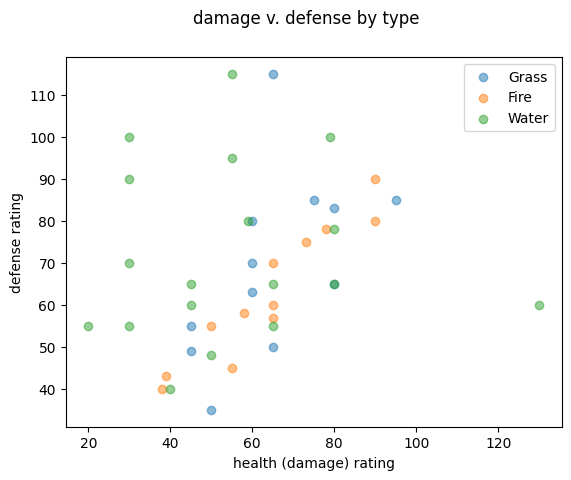

In [13]:
# get types as a list and only keep first three (Grass, Fire, Water)
ptypes = poke_df['MainType'].unique().tolist()[0:3]

for ptype in ptypes:
    bool_type = poke_df['MainType'] == ptype
    type_df = poke_df.loc[bool_type, :]
    
    plt.scatter(type_df['Damage'], type_df['Defense'], alpha = .5, label = ptype)
    
plt.legend()
plt.xlabel('health (damage) rating')
plt.ylabel('defense rating')
plt.suptitle('damage v. defense by type')

### Pokemon (with seaborn)

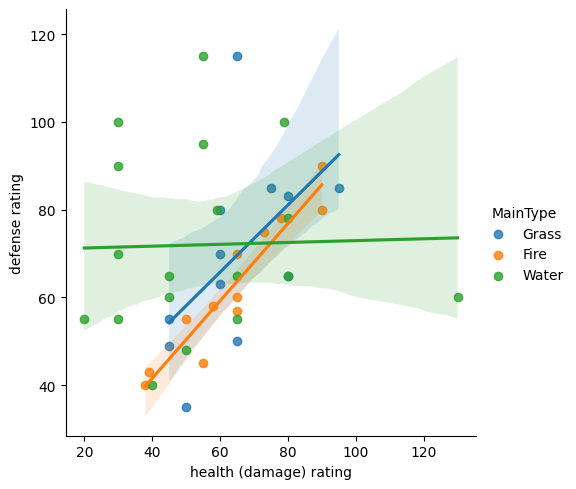

In [14]:
import seaborn as sns

# how to check if multiple values are in a series
pokesub_bool = poke_df['MainType'].isin(ptypes)
pokesub_df = poke_df.loc[pokesub_bool, :]

# make the same plot, but with lines
g2 = sns.lmplot(
     data=pokesub_df,
     x='Damage', y='Defense', hue='MainType',
     height=5
)

# Use more informative axis labels than are provided by default
g2.set_axis_labels("health (damage) rating", "defense rating")

### Log-Birthday

In [15]:
from datetime import datetime, timedelta

df_log_birth = pd.DataFrame()

birth_date = datetime(year=1990, month=12, day=20, hour=10, minute=42)

for exp in range(11):
    # compute 10 ^ exp seconds after birth_date
    offset = timedelta(seconds=(10 ** exp))
    
    # compute moment of the log birthday
    bday = birth_date + offset
    
    # build a row of log birthday party
    s_bday = pd.Series({'bday': f'10^{exp} sec',
              'year': bday.year,
              'month': bday.month,
              'day': bday.day,
              'hour': bday.hour,
              'minute': bday.minute,
              'sec': bday.second,
              'read_day': bday.strftime('%B-%d-%Y %H:%M %p')})
    
    # store it
    df_log_birth = df_log_birth.append(s_bday, ignore_index=True)

df_log_birth

,bday,year,month,day,hour,minute,sec,read_day
0,10^0 sec,1990,12,20,10,42,1,December-20-1990 10:42 AM
1,10^1 sec,1990,12,20,10,42,10,December-20-1990 10:42 AM
2,10^2 sec,1990,12,20,10,43,40,December-20-1990 10:43 AM
3,10^3 sec,1990,12,20,10,58,40,December-20-1990 10:58 AM
4,10^4 sec,1990,12,20,13,28,40,December-20-1990 13:28 PM
5,10^5 sec,1990,12,21,14,28,40,December-21-1990 14:28 PM
6,10^6 sec,1991,1,1,0,28,40,January-01-1991 00:28 AM
7,10^7 sec,1991,4,15,4,28,40,April-15-1991 04:28 AM
8,10^8 sec,1994,2,19,20,28,40,February-19-1994 20:28 PM
9,10^9 sec,2022,8,28,12,28,40,August-28-2022 12:28 PM
